In [ ]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#Import all necessary librabry

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
#Read training data file
trainfile = r'/gdrive/My Drive/DecisionTree/Santander Customer Satisfaction - TRAIN.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'/gdrive/My Drive/DecisionTree/Santander Customer Satisfaction - TEST-Without TARGET.csv'
testData = pd.read_csv(testfile)

trainData.head()
#print("=======")
testData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
print(trainData.shape)      # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape 
print(testData.shape)

(76020, 371)
(75818, 370)


In [ ]:
#Understanding the Columns

trainData.info()
print()
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [ ]:
# To check number of null values
trainData.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
# To check basic statistics of a data set, column wise
trainData.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData.copy()

(76020, 370)
(76020, 1)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
#dt = DecisionTreeClassifier(random_state=0,max_depth=30,splitter="random")
dt = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=10, min_samples_split=5)
dt.fit(Xtrain, Ytrain)
#Y_Pred = dt.predict(Xtest)
#Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       splitter='random')

In [ ]:
# Basic Analysis
print("Count of 0 & 1 in TARGET column for Train Data")
print(Ytrain['TARGET'].value_counts())


Count of 0 & 1 in TARGET column for Train Data
0    73012
1     3008
Name: TARGET, dtype: int64


In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available. 
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

X_Pred = dt.predict(Xtrain)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Ytrain,X_Pred))

# This will always result in best score hence we are better of using TrainTestSplit, which can help us take care of 

Accuracy: 0.9616416732438832


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .30, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

Accuracy: 0.9603174603174603


In [ ]:
prepro=dt.predict_proba(testData)
prepro

array([[0.97563805, 0.02436195],
       [0.9526127 , 0.0473873 ],
       [1.        , 0.        ],
       ...,
       [0.99646483, 0.00353517],
       [0.9526127 , 0.0473873 ],
       [0.99646483, 0.00353517]])

In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[21895    25]
 [  880     6]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21920
           1       0.19      0.01      0.01       886

    accuracy                           0.96     22806
   macro avg       0.58      0.50      0.50     22806
weighted avg       0.93      0.96      0.94     22806



[Text(0.5227631578947368, 0.9545454545454546, 'X[64] <= 0.185\nentropy = 0.242\nsamples = 53214\nvalue = [51092, 2122]'),
 Text(0.23348684210526316, 0.8636363636363636, 'X[94] <= 2.445\nentropy = 0.437\nsamples = 14242\nvalue = [12958, 1284]'),
 Text(0.0838157894736842, 0.7727272727272727, 'X[24] <= 0.372\nentropy = 0.429\nsamples = 14028\nvalue = [12795, 1233]'),
 Text(0.016842105263157894, 0.6818181818181818, 'X[300] <= 21.714\nentropy = 0.084\nsamples = 285\nvalue = [282, 3]'),
 Text(0.01263157894736842, 0.5909090909090909, 'X[296] <= 1.885\nentropy = 0.06\nsamples = 284\nvalue = [282, 2]'),
 Text(0.008421052631578947, 0.5, 'X[125] <= 0.548\nentropy = 0.034\nsamples = 281\nvalue = [280, 1]'),
 Text(0.004210526315789474, 0.4090909090909091, 'entropy = 0.0\nsamples = 262\nvalue = [262, 0]'),
 Text(0.01263157894736842, 0.4090909090909091, 'X[12] <= 113.812\nentropy = 0.297\nsamples = 19\nvalue = [18, 1]'),
 Text(0.008421052631578947, 0.3181818181818182, 'entropy = 0.811\nsamples = 4\nv

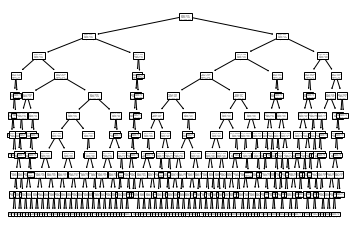

In [ ]:
#Plotting the decesion Tree
tree.plot_tree(dt)

In [ ]:
#Get Class Prediction probabilities as a data frame 
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(dt.predict_proba(X_train))

pred_Probability.head()

,0,1
0,0.993522,0.006478
1,0.933060,0.066940
2,1.000000,0.000000
3,0.975638,0.024362
4,0.952613,0.047387


In [ ]:
cd~

/root


In [ ]:
finaloutput1=pd.DataFrame(prepro[:,1],columns=['TARGET'])
finaloutput1

,TARGET
0,0.024362
1,0.047387
2,0.000000
3,0.021550
4,0.003535
...,...
75813,0.021550
75814,0.018612
75815,0.003535
75816,0.047387


In [ ]:
id=testData['ID']

In [ ]:
Y_Pred = dt.predict(testData)
pred_df = []
for vals in zip(id,Y_Pred):
    pred_df.append(vals)
   
print(pred_df[:5])
    
pred_df = pd.DataFrame(pred_df,columns=['ID','TARGET'])

pred_df.to_csv('pred_G_US_final.csv', index=None)

[(2, 0), (5, 0), (6, 0), (7, 0), (9, 0)]


In [ ]:
from google.colab import files
files.download('pred_G_US_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results2 = pd.read_csv('pred_G_US_final.csv')

print(len(results2))

75818


In [ ]:
print(len(Y_PredNew))

22806
